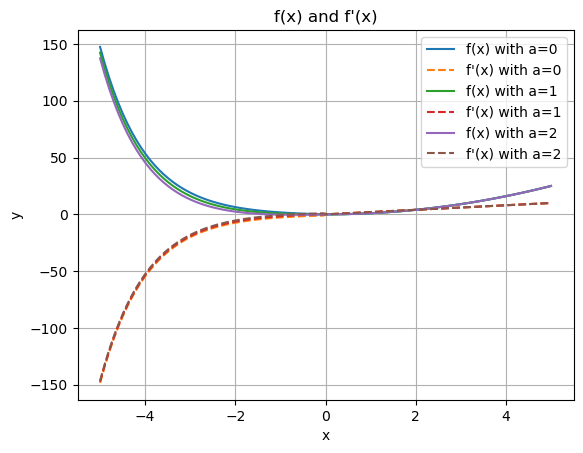

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# a

def f(x, a):
    if x < 0:
        return np.exp(-x) + a*x - 1
    elif x > 0:
        return x**2

def f_derived(x, a):
    if x < 0:
        return -np.exp(-x) + a
    elif x > 0:
        return 2*x

x_values = np.linspace(-5, 5, 100)

a_values = [0, 1, 2]

for a in a_values:
    f_values = [f(x, a) for x in x_values]
    f_derived_values = [f_derived(x, a) for x in x_values]
    
    plt.plot(x_values, f_values, label=f"f(x) with a={a}")
    plt.plot(x_values, f_derived_values, label=f"f'(x) with a={a}", linestyle='dashed')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x) and f\'(x)')
plt.grid(True)
plt.show()


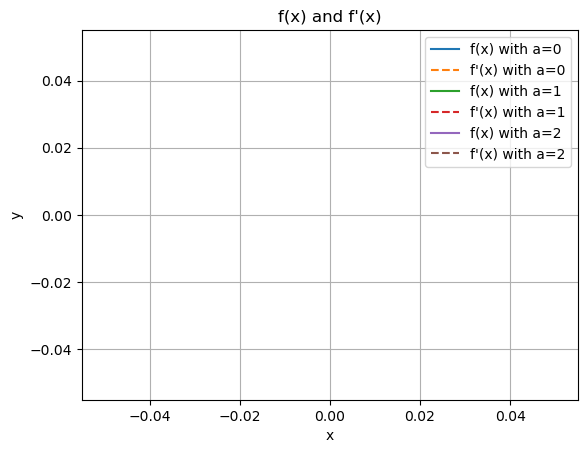

In [50]:
# b) f(0) and f'(0) is not well-defined for any a. The function is only defined for x <> 0, regardless of a.

x_values = [0]
for a in a_values:
    f_values = [f(x, a) for x in x_values]
    f_derived_values = [f_derived(x, a) for x in x_values]
    
    plt.plot(x_values, f_values, label=f"f(x) with a={a}")
    plt.plot(x_values, f_derived_values, label=f"f'(x) with a={a}", linestyle='dashed')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x) and f\'(x)')
plt.grid(True)
plt.show()

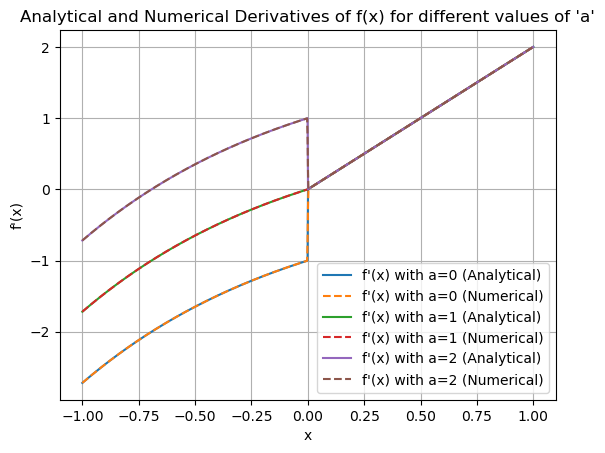

In [51]:
# d
def central_derivative_second_order(x, dx, a):
    return (f(x+dx,a)-f(x-dx,a))/(2*dx)

# grid-spacing
N = 1000
dx = 2 / N

x_values = np.linspace(-1, 1, N)
a_values = [0, 1, 2]

f_derived_analytical_list = []
f_derived_numerical_list = []

for a in a_values:
    f_prime_analytical = [f_derived(x, a) for x in x_values]
    f_derived_analytical_list.append(f_prime_analytical)

    f_prime_numerical = [central_derivative_second_order(x, dx, a) for x in x_values]
    f_derived_numerical_list.append(f_prime_numerical)

for i, a in enumerate(a_values):
    plt.plot(x_values, f_derived_analytical_list[i], label=f"f'(x) with a={a} (Analytical)")
    plt.plot(x_values, f_derived_numerical_list[i], linestyle='dashed', label=f"f'(x) with a={a} (Numerical)")
    
plt.legend()
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.title("Analytical and Numerical Derivatives of f(x) for different values of 'a'")
plt.grid(True)
plt.show()

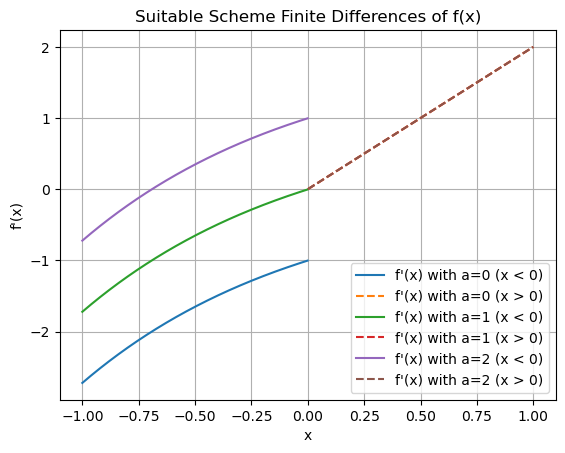

In [52]:
# e
def suitable_scheme_finite_difference(x, dx, a):
    if x < 0:
        return (f(x, a) - f(x - dx, a)) / dx
    elif x > 0:
        return (f(x + dx, a) - f(x, a)) / dx

x_values_negative = np.linspace(-1, 0, N)
x_values_positive = np.linspace(0, 1, N)

a_values = [0, 1, 2]
for a in a_values:
    f_derived_negative = [suitable_scheme_finite_difference(x, dx, a) for x in x_values_negative]
    f_derived_positive = [suitable_scheme_finite_difference(x, dx, a) for x in x_values_positive]

    plt.plot(x_values_negative, f_derived_negative, label=f"f'(x) with a={a} (x < 0)")
    plt.plot(x_values_positive, f_derived_positive, linestyle='dashed', label=f"f'(x) with a={a} (x > 0)")

plt.legend()
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.title("Suitable Scheme Finite Differences of f(x)")
plt.grid(True)
plt.show()


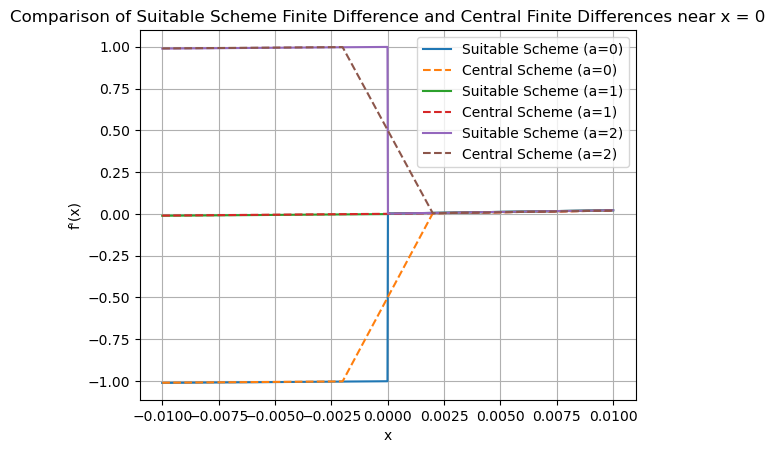

In [53]:
# f
x_values = np.linspace(-0.01, 0.01, N)

#a_values = [0, 1, 2]
for a in a_values:
    f_prime_one_sided = [suitable_scheme_finite_difference(x, dx, a) for x in x_values]
    f_prime_central = [central_derivative_second_order(x, dx, a) for x in x_values]

    plt.plot(x_values, f_prime_one_sided, label=f"Suitable Scheme (a={a})")
    plt.plot(x_values, f_prime_central, linestyle='dashed', label=f"Central Scheme (a={a})")

plt.legend()
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.title("Comparison of Suitable Scheme Finite Difference and Central Finite Differences near x = 0")
plt.grid(True)
plt.show()
